In [1]:
import geomalgo as ga
%load_ext Cython
%load_ext wurlitzer
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%cython

from libc.stdio cimport printf
cimport geomalgo as ga

cdef:
    ga.CPoint3D A, B, C
    ga.CTriangle3D ABC
    
A.x, A.y, A.z = 0, 0, 0
B.x, B.y, B.z = 1, 1, 0
C.x, C.y, C.z = 1, 1, 0

ABC.A = &A
ABC.B = &B
ABC.C = &C

printf("ABC.B.x: %.1f\n", ABC.B.x)

ABC.B.x: 1.0


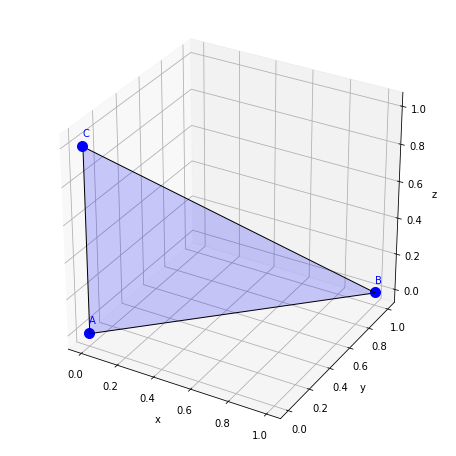

In [3]:
A = ga.Point3D(0, 0, 0, name='A')
B = ga.Point3D(1, 1, 0, name='B')
C = ga.Point3D(0, 0, 1, name='C')

ABC = ga.Triangle3D(A, B, C)

fig = plt.figure(figsize=(8,8))

for obj in [ABC, A, B, C]:
    obj.plot()
    
ax = gca(projection='3d')
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [4]:
%%cython

from libc.stdio cimport printf
cimport geomalgo as ga

cdef:
    ga.Point3D A = ga.Point3D(0, 0, 0)
    ga.Point3D B = ga.Point3D(1, 1, 0)
    ga.Point3D C = ga.Point3D(0, 0, 1)
    ga.Triangle3D ABC = ga.Triangle3D(A, B, C)
    ga.CTriangle3D* ptr
    
ABC = ga.Triangle3D(A, B, C)

ptr = &ABC.ctri3d
printf('ABC.B.x: %.1f\n', ptr.B.x)

ABC.B.x: 1.0


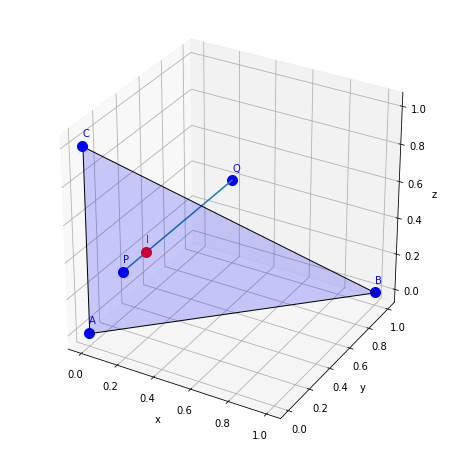

In [ ]:
P = ga.Point3D(0.2, 0., 0.4, name='P')
Q = ga.Point3D(0.2, 1., 0.4, name='Q')
PQ = ga.Segment3D(P, Q)

I = ga.intersec3d_triangle_segment(ABC, PQ)
I.name = 'I'

fig = plt.figure(figsize=(8,8))

for obj in [ABC, A, B, C, PQ, P, Q]:
    obj.plot()
    
I.plot(color='r')

ax = gca(projection='3d')
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')